In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F
from configs.parameters import *
from configs.filenames import *

import matplotlib.pyplot as plt
import numpy as np
import os

C = float(os.getenv("C", C))
sig = float(os.getenv("sig", sig))
itr = int(os.getenv("itr", itr))

print(f"📢 Using parameters: C={C}, sig={sig}, itr={itr}")

📢 Using parameters: C=0.01, sig=0.12, itr=20000


In [2]:
output_dir = "../data/"

lower_bound = int(20/dt)
upper_bound = int(80/dt)

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "WCM", **params)
savefile = os.path.join(output_dir, filename)
data      = np.load(savefile, allow_pickle=True)      
t, EE, II = data[lower_bound:upper_bound,0], data[lower_bound:upper_bound,1], data[lower_bound:upper_bound,2]
print(f"✅ Opened {savefile}")

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "PRC", **params)
savefile = os.path.join(output_dir, filename)
data      = np.load(savefile, allow_pickle=True)      
t, ZE, ZI = data[lower_bound:upper_bound,0], data[lower_bound:upper_bound,1], data[lower_bound:upper_bound,2]
print(f"✅ Opened {savefile}")

✅ Opened ../data/WCM_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_E0=0_I0=0.npy
✅ Opened ../data/PRC_WCM_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_ZE1=-5_ZI1=1.npy


In [3]:
RANGE = len(t) - 2*d
print(RANGE)

first_part = np.zeros((2,len(t)))
second_part = np.zeros((2,len(t)))
norm = np.zeros((2,len(t)))

for i in range(RANGE):
    first_part[:,i] = [(ZE[i] * ((EE[i]-EE[i-1])/dt)),\
                       (ZI[i] * ((II[i]-II[i-1])/dt))]
    integral = np.zeros((2,2*RANGE))
    
    for s in range(i-d,i):
        integral[:,s] = [(ZE[s+d] * (((wee * F(EE[s]) * (1 - F(EE[s]))) * ((EE[s]-EE[s-1])/dt)) + ((-wei * F(II[s]) * (1 - F(II[s]))) * ((II[s]-II[s-1])/dt)))),\
                         (ZI[s+d] * (((wie * F(EE[s]) * (1 - F(EE[s]))) * ((EE[s]-EE[s-1])/dt)) + ((-wii * F(II[s]) * (1 - F(II[s]))) * ((II[s]-II[s-1])/dt))))]
        
    second_part[:,i] = np.sum(integral, axis=1) * dt
    norm[:,i] = first_part[:,i] + second_part[:,i]
    print(t, end = '\r')

norm_EE = norm[0,:]
norm_II = norm[1,:]

first_part_EE = first_part[0,:]
first_part_II = first_part[1,:]

second_part_EE = second_part[0,:]
second_part_II = second_part[1,:]

11600
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.011000

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995


[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ... 79.98899925 79.9939995
[20.001      20.00600025 20.0110005  ...

Normalization constant = -2.668


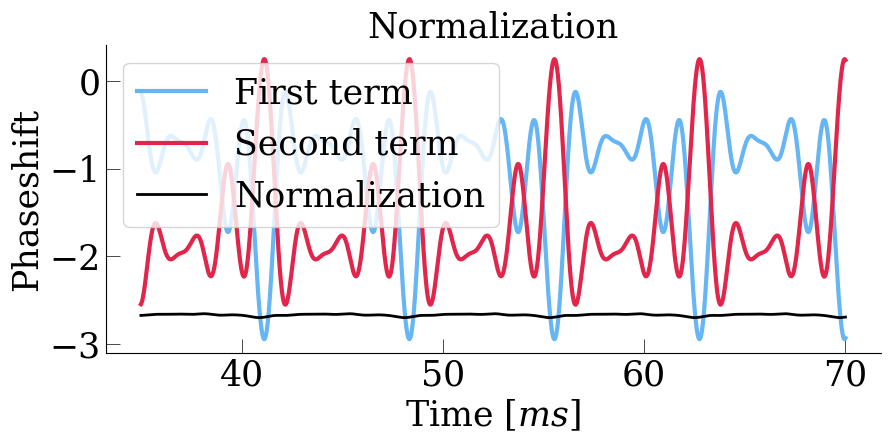

In [4]:
apply_plot_settings()

Norm = norm_EE + norm_II
first_part = first_part_EE + first_part_II
second_part = second_part_EE + second_part_II

bottom = 3000
top = 10000

t = t[bottom:top]
Norm = Norm[bottom:top]
first_part = first_part[bottom:top]
second_part = second_part[bottom:top]

Norm_constant = np.mean(Norm[:])
print('Normalization constant =', '{0:.3f}'.format(Norm_constant))

fig, ax = plt.subplots(figsize=(10, 4)) 

ax.plot(t, first_part, linewidth=3, label = 'First term', color = "#66B5F4")
ax.plot(t, second_part, linewidth=3, label = 'Second term', color = "#E2254B")
ax.plot(t, Norm, linewidth=2, label='Normalization', color = "black")
ax.set_xlabel('Time $[ms]$')
ax.set_ylabel('Phaseshift')
ax.set_title('Normalization')
ax.legend()

plt.show()

In [5]:
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "PRC", **params)
savefile = os.path.join(output_dir, filename)
data      = np.load(savefile, allow_pickle=True)          
t, ZE, ZI = data[:,0], data[:,1], data[:,2]

ZE_normalized = ZE / Norm_constant
ZI_normalized = ZI / Norm_constant

# Stack data efficiently
data = np.column_stack((t, ZE_normalized, ZI_normalized))

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "Normalized_PRC", **params)
savefile = os.path.join(output_dir, filename)
np.save(savefile, data, allow_pickle=True)

print(f"✅ Data saved to {savefile}")

✅ Data saved to ../data/Normalized_PRC_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_ZE1=-5_ZI1=1.npy
